# CS2806--Machine Learning Techniques Lab

# Endsem Practical Examination

### 17th April 2024

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Cyber1_train.csv")

df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Cyber1_test.csv")

## Exploratory Data Analysis

#### Data Visualization

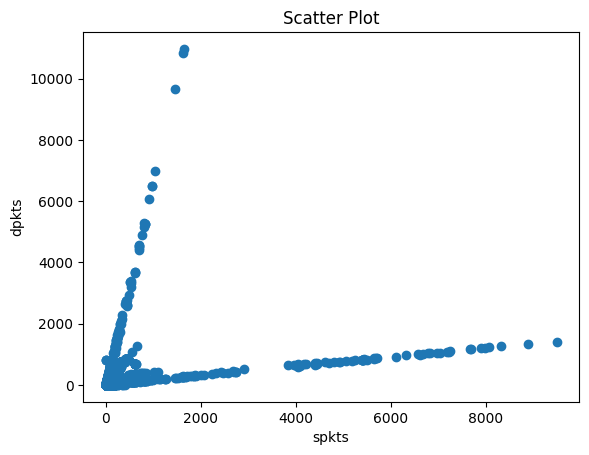

In [4]:

import matplotlib.pyplot as plt

plt.scatter(df_train['spkts'], df_train['dpkts'])
plt.xlabel('spkts')
plt.ylabel('dpkts')
plt.title('Scatter Plot')
plt.show()

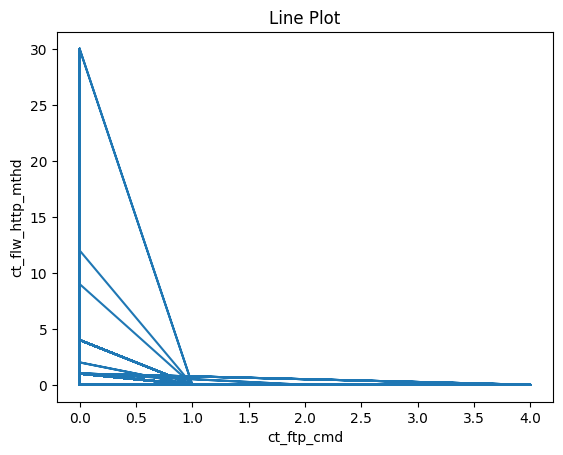

In [5]:
plt.plot(df_train['ct_ftp_cmd'], df_train['ct_flw_http_mthd'])
plt.xlabel('ct_ftp_cmd')
plt.ylabel('ct_flw_http_mthd')
plt.title('Line Plot')
plt.show()

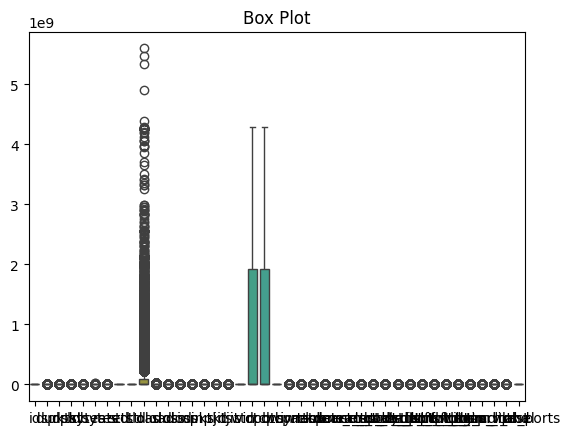

In [ ]:
sns.boxplot(data=df_train)
plt.title('Box Plot')
plt.show()

#### Training Dataset Insights

In [8]:
print(df_train.head(10))

print("--------------------------")

print(df_train.columns)

print("--------------------------")

print(df_train.describe())

print("---------------------")

print(df_train.isnull().sum())

print("---------------------------")

print(df_train.select_dtypes(include=['object']).columns)

print("---------------------------------")

print(df_train['label'].value_counts())

       id       dur    proto service state  spkts  dpkts  sbytes  dbytes  \
0  151143  0.000003      udp       -   INT      2      0     104       0   
1   80153  2.308886      tcp       -   FIN     10      8     564     354   
2  164542  0.000003      udp     dns   INT      2      0     114       0   
3   32390  0.004722      tcp       -   FIN     18     18    3960    2456   
4  161063  0.000002      udp     dns   INT      2      0     114       0   
5  169111  0.000003  bbn-rcc       -   INT      2      0     180       0   
6   66857  0.000007     unas       -   INT      2      0     200       0   
7   31429  0.031357      tcp       -   FIN     72     74    4238   63516   
8  134943  0.000003      udp     dns   INT      2      0     114       0   
9   63628  1.035081      tcp    http   FIN     10     12    1936    3538   

            rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0  333333.321500  ...                 1               2             0   
1       7.362858 

#### Testing Data Insights

In [9]:
print(df_test.head(10))

print("--------------------------")

print(df_test.columns)

print("---------------------------------------")

print(df_test.describe())

print("---------------------")

print(df_test.isnull().sum())

print("---------------------------")

print(df_test.select_dtypes(include=['object']).columns)

print("---------------------------------")

print(df_test['label'].value_counts())

       id       dur   proto service state  spkts  dpkts  sbytes  dbytes  \
0  102165  1.959922     tcp    http   FIN     10     10     864    1754   
1   54425  0.000008  sun-nd       -   INT      2      0     200       0   
2   58825  0.000001     udp       -   INT      2      0     168       0   
3   85054  0.948013     tcp    http   FIN     12     10    1296    2844   
4   93048  0.000006    unas       -   INT      2      0     200       0   
5   69512  1.082475     tcp     ftp   FIN     20     22    1096    1664   
6   49298  2.070405     tcp       -   FIN    172     30  217655    1300   
7  159406  0.000007     udp     dns   INT      2      0     114       0   
8  144618  0.000006     udp     dns   INT      2      0     114       0   
9   59269  0.649982     tcp     ftp   FIN     10      8    2524     608   

           rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0  9.694264e+00  ...                 1               2             0   
1  1.250000e+05  ...          



---



## Preprocessing

**There was no null values found in the training and testing dataset**

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#### Encoding the categorical values in the training dataset

In [11]:
print(df_train.select_dtypes(include=['object']).columns)

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')


In [12]:
df_train["proto_encoded"] = label_encoder.fit_transform(df_train["proto"])
df_train["service_encoded"] = label_encoder.fit_transform(df_train["service"])
df_train["state_encoded"] = label_encoder.fit_transform(df_train["state"])
df_train["attack_cat_encoded"] = label_encoder.fit_transform(df_train["attack_cat"])

In [13]:
print(df_train.columns)

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label', 'proto_encoded',
       'service_encoded', 'state_encoded', 'attack_cat_encoded'],
      dtype='object')


In [14]:
print(df_train.select_dtypes(include=['object']).columns)

print("---------------------------------")

print(df_train.select_dtypes(exclude=['object']).columns)

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')
---------------------------------
Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label', 'proto_encoded',
       'service_encoded', 'state_encoded', 'attack_cat_encoded'],
      dtype='object')


#### Encoding the categorical values in the testing dataset



In [15]:
print(df_test.select_dtypes(include=['object']).columns)

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')


In [16]:
df_test["proto_encoded"] = label_encoder.fit_transform(df_test["proto"])
df_test["service_encoded"] = label_encoder.fit_transform(df_test["service"])
df_test["state_encoded"] = label_encoder.fit_transform(df_test["state"])
df_test["attack_cat_encoded"] = label_encoder.fit_transform(df_test["attack_cat"])

In [12]:
print(df_test.select_dtypes(include=['object']).columns)

print("---------------------------------")

print(df_test.select_dtypes(exclude=['object']).columns)

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')
---------------------------------
Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label', 'proto_encoded',
       'service_encoded', 'state_encoded', 'attack_cat_encoded'],
      dtype='object')


In [13]:
X_train = df_train.drop(['id', 'proto', 'service', 'state', 'attack_cat', 'label'], axis=1)
X_test = df_test.drop(['id', 'proto', 'service', 'state', 'attack_cat', 'label'], axis=1)
Y_train = df_train['label']
Y_test = df_test['label']

In [14]:
print(X_train)

print("--------------------------")

print(Y_train)

print("--------------------------")

print(X_test)

print("---------------------")

print(Y_test)

             dur  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl  \
0       0.000003      2      0     104       0  333333.321500   254     0   
1       2.308886     10      8     564     354       7.362858   254   252   
2       0.000003      2      0     114       0  333333.321500   254     0   
3       0.004722     18     18    3960    2456    7412.113355    31    29   
4       0.000002      2      0     114       0  500000.001300   254     0   
...          ...    ...    ...     ...     ...            ...   ...   ...   
112212  0.018230     16     18    1540    1644    1810.202911    31    29   
112213  0.531906     10      6     874     268      28.200471   254   252   
112214  0.009425      8     12     424    8824    2015.915058    31    29   
112215  0.000005      2      0     114       0  200000.005100   254     0   
112216  1.129524     14     10     774     556      20.362560   254   252   

               sload         dload  ...  is_ftp_login  ct_ftp_cmd  \
0     

#### As there was a class imbalance problem for the attribute - label in the given training dataset, ADASYN will be implemented

**Why ADASYN is implemented?**

Its a improved version of Smote. What it does is same as SMOTE just with a minor improvement. After creating those sample it adds a random small values to the points thus making it more realistic. In other words instead of all the sample being linearly correlated to the parent they have a little more variance in them i.e they are bit scattered.

In [15]:
from collections import Counter

counter = Counter(Y_train)
print("Before", counter)


Before Counter({1: 76377, 0: 35840})


In [16]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(sampling_strategy='auto', random_state=42)
X_resampled_train, Y_resampled_train = ada.fit_resample(X_train, Y_train)


In [17]:
from collections import Counter

counter = Counter(Y_resampled_train)
print("After", counter)

After Counter({0: 76542, 1: 76377})


#### As there was a class imbalance problem for the attribute - label in the given testing dataset, ADASYN will be implemented

**Why ADASYN is implemented?**

Its a improved version of Smote. What it does is same as SMOTE just with a minor improvement. After creating those sample it adds a random small values to the points thus making it more realistic. In other words instead of all the sample being linearly correlated to the parent they have a little more variance in them i.e they are bit scattered.

In [18]:
from collections import Counter

counter = Counter(Y_test)
print("Before", counter)

Before Counter({1: 23869, 0: 11200})


In [19]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(sampling_strategy='auto', random_state=42)
X_resampled_test, Y_resampled_test = ada.fit_resample(X_test, Y_test)


In [20]:
from collections import Counter

counter = Counter(Y_resampled_test)
print("After", counter)

After Counter({1: 23869, 0: 22979})


## Models Development

#### KNN Classifier

**KNN Classifier was chosen because as it makes highly accurate predictions**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_resampled_train, Y_resampled_train)
Y_pred = knn_classifier.predict(X_resampled_test)


accuracy = accuracy_score(Y_resampled_test, Y_pred)
precision = precision_score(Y_resampled_test, Y_pred)
recall = recall_score(Y_resampled_test, Y_pred)
f1 = f1_score(Y_resampled_test, Y_pred)
auc_roc = roc_auc_score(Y_resampled_test, Y_pred)
conf_matrix = confusion_matrix(Y_resampled_test, Y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", auc_roc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.778624487704918
Precision: 0.7738153197013956
Recall: 0.7990699233315178
F1 Score: 0.7862398746831007
ROC AUC Score: 0.778228551465141
Confusion Matrix:
 [[17404  5575]
 [ 4796 19073]]


#### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rfc.fit(X_resampled_train, Y_resampled_train)

Y_pred = rfc.predict(X_resampled_test)

accuracy = accuracy_score(Y_resampled_test, Y_pred)
precision = precision_score(Y_resampled_test, Y_pred)
recall = recall_score(Y_resampled_test, Y_pred)
f1 = f1_score(Y_resampled_test, Y_pred)
auc_roc = roc_auc_score(Y_resampled_test, Y_pred)
conf_matrix = confusion_matrix(Y_resampled_test, Y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", auc_roc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9561560792349727
Precision: 0.9376830785281489
Recall: 0.9790104319410113
F1 Score: 0.9579012092641934
ROC AUC Score: 0.9557134930930958
Confusion Matrix:
 [[21426  1553]
 [  501 23368]]


**Random forest was chosen as it is a flexible, easy-to-use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most-used algorithms, due to its simplicity and diversity**

#### Voting Classifier

In [53]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


model1 = LogisticRegression()
model2 = GaussianNB()
model3 = DecisionTreeClassifier(max_depth=3)


model = VotingClassifier(estimators=[('lr', model1), ('gnb', model2), ('dt', model3)], voting='hard')
model.fit(X_resampled_train, Y_resampled_train)

Y_pred = model.predict(X_resampled_test)

accuracy = accuracy_score(Y_resampled_test, Y_pred)
precision = precision_score(Y_resampled_test, Y_pred)
recall = recall_score(Y_resampled_test, Y_pred)
f1 = f1_score(Y_resampled_test, Y_pred)
auc_roc = roc_auc_score(Y_resampled_test, Y_pred)
conf_matrix = confusion_matrix(Y_resampled_test, Y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", auc_roc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8319245218579235
Precision: 0.8882093102276588
Recall: 0.7666010306254976
F1 Score: 0.8229368113334833
ROC AUC Score: 0.8331895444262872
Confusion Matrix:
 [[20676  2303]
 [ 5571 18298]]


**Voting Classifier was chosen because as the voting relies on the performance of many models, they will not be affected by large errors or misclassifications from one model. In other words poor performance from one model can be offset by a strong performance from other models.**

### Saving the Model as Pickle File

In [62]:
import joblib

joblib.dump(knn_classifier, 'knn.pkl')

['knn.pkl']

#### Performing the Prediction on the given validation set

In [63]:
import joblib

validation_csv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Cyber1_val_students.csv")

cleaned_csv = validation_csv.drop(['id'], axis=1)

cat_col = cleaned_csv.select_dtypes(include=['object']).columns

print(cat_col)

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')


In [64]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in cat_col:
  cleaned_csv["{col_name}_encoded".format(col_name=col)] = label_encoder.fit_transform(cleaned_csv[col])

In [65]:
testing_csv = cleaned_csv.drop([cat_col[0], cat_col[1], cat_col[2], cat_col[3]], axis=1)

In [49]:
print(testing_csv.head(10))

         dur  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl  \
0   0.193222     16     18    1272    2572     170.788004    31    29   
1  34.554440     36     22   19126    1748       1.649571   254   252   
2   0.000008      2      0     200       0  125000.000300   254     0   
3   0.000009      2      0     200       0  111111.107200   254     0   
4   4.396542     16     12    3232     642       6.141190   254   252   
5   0.000003      2      0     200       0  333333.321500   254     0   
6   0.000005      2      0     114       0  200000.005100   254     0   
7   0.658790     10      8     564     354      25.804885   254   252   
8   0.000009      2      0     114       0  111111.107200   254     0   
9   0.000003      2      0     200       0  333333.321500   254     0   

          sload          dload  ...  is_ftp_login  ct_ftp_cmd  \
0  4.939396e+04  100609.664100  ...             0           0   
1  4.305091e+03     386.404755  ...             0           0   
2

In [66]:
ids_model = joblib.load("/content/knn.pkl")

ids_model_predictions = []

for record in testing_csv.values:
  ids_prediction = ids_model.predict([record])[0]
  ids_model_predictions.append(ids_prediction)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-pac

In [68]:
id_df = validation_csv['id']

predictions_df = pd.DataFrame({'Label': ids_model_predictions})

merged_df = pd.concat([id_df, predictions_df], axis=1)

file_name = 'prediction_results_22011103020-knn.csv'

merged_df.to_csv(file_name, index=False)

